# WELCOME!

Welcome to **"Bike Demand Visualization Project"**. As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.  

The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

This will allow us to X-ray the data as part of the EDA process before setting up a machine learning model.



---
---



# #Determines



#### Features

- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

**"weather_code" category description:**
* 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
* 2 = scattered clouds / few clouds 
* 3 = Broken clouds 
* 4 = Cloudy 
* 7 = Rain/ light Rain shower/ Light rain 
* 10 = rain with thunderstorm 
* 26 = snowfall 
* 94 = Freezing Fog
---

Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc.  Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.  


# Tasks


### 1.Import libraries

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

### Read dataset

In [43]:
df = pd.read_csv('store_sharing.csv')

df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


### Check missing values and if there are any dublicate rows or not.

In [44]:
# Check the missing values
df.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [45]:
# Check the duplicated rows
df.duplicated().sum()

0

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


### Plot the distribution of various discrete features on (Season, holiday, weekend and weathercode)

In [47]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


<Axes: xlabel='season', ylabel='cnt'>

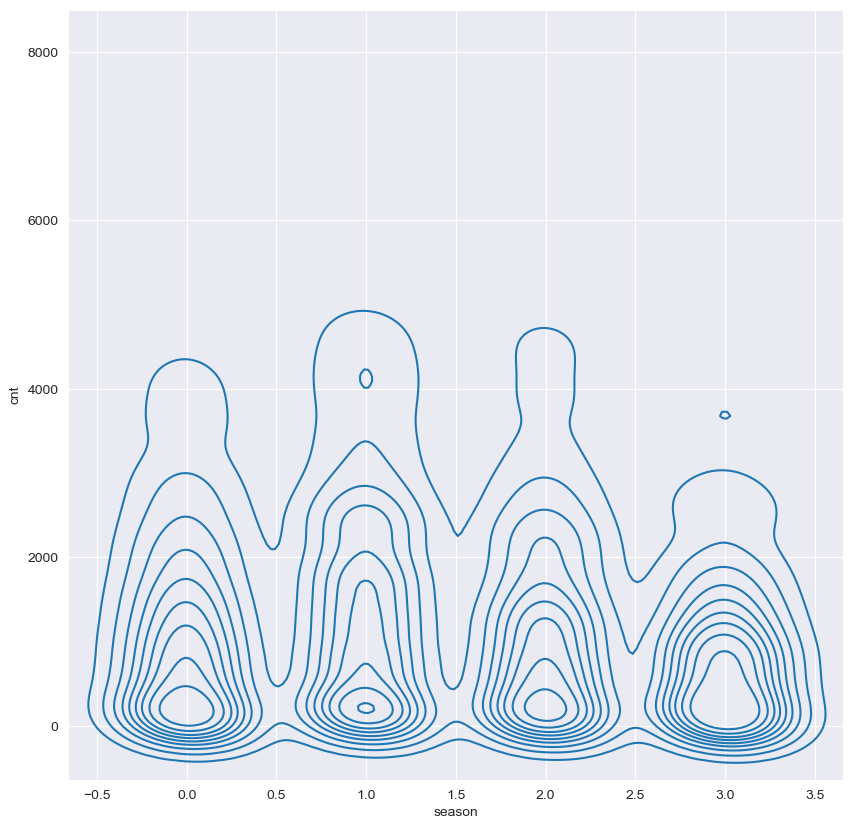

In [48]:
# season
df.head()
plt.figure(figsize=(10,10))
sns.kdeplot(x=df['season'], y=df['cnt'], data = df)

<Axes: xlabel='is_holiday', ylabel='cnt'>

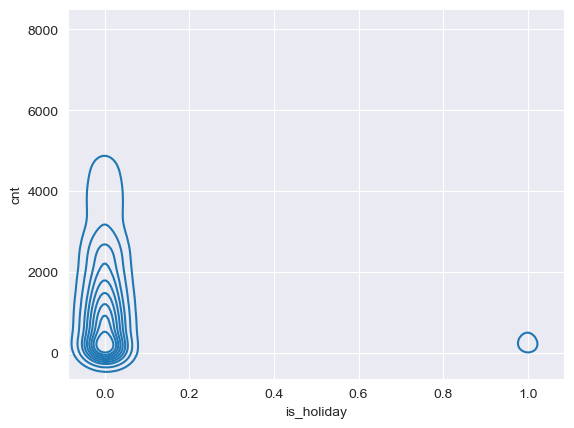

In [49]:
# is_holiday
sns.kdeplot(x=df['is_holiday'], y=df['cnt'], data = df)

<Axes: xlabel='is_weekend', ylabel='cnt'>

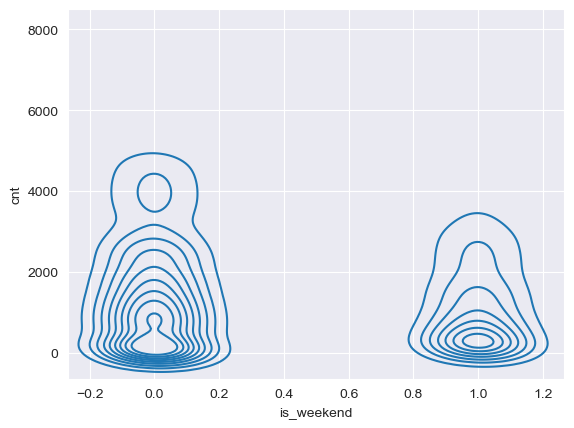

In [50]:
# is_weekend
sns.kdeplot(x=df['is_weekend'], y=df['cnt'], data = df)

<Axes: xlabel='weather_code', ylabel='cnt'>

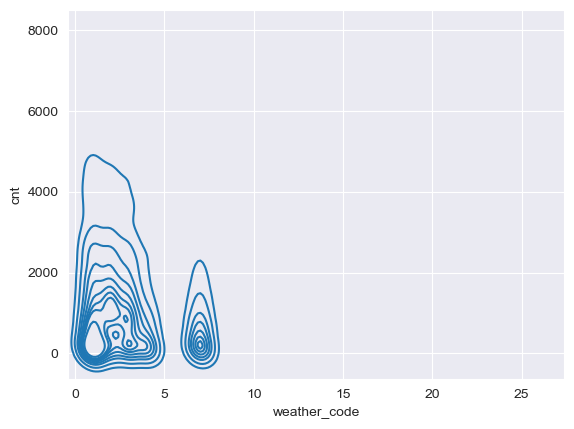

In [51]:
# weather_code
sns.kdeplot(x=df['weather_code'], y=df['cnt'], data = df)

### Look at the data type of each variable, transform `timestamp` in type, and set it as index.

In [52]:
print(df.dtypes)

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object


In [53]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)


- Timestamp is exactly two years. You can do feature engineering using the `year, month, day_of_month, day_of_week, hour` in the timestamp.

### Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)

you can use strftime('%Y-%m') for year_mount

In [54]:
df['day_of_week'] = df.index.strftime('%A')  # Day of the week
df['day_of_month'] = df.index.day  # Day of the month
df['hour'] = df.index.hour  # Hour
df['month'] = df.index.month  # Month
df['year'] = df.index.year  # Year
df['season'] = df.index.quarter  # Season
df['year_month'] = df.index.strftime('%Y-%m')  # Year and month


In [55]:
df.head(100)

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,day_of_week,day_of_month,hour,month,year,year_month
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,1,Sunday,4,0,1,2015,2015-01
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,1,Sunday,4,1,1,2015,2015-01
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,1,Sunday,4,2,1,2015,2015-01
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,1,Sunday,4,3,1,2015,2015-01
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,1,Sunday,4,4,1,2015,2015-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-01-08 00:00:00,123,11.0,11.0,82.0,26.0,4.0,0.0,0.0,1,Thursday,8,0,1,2015,2015-01
2015-01-08 01:00:00,56,11.5,11.5,85.0,24.0,3.0,0.0,0.0,1,Thursday,8,1,1,2015,2015-01
2015-01-08 02:00:00,51,12.0,12.0,82.0,25.0,3.0,0.0,0.0,1,Thursday,8,2,1,2015,2015-01


In [56]:
df.columns

Index(['cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code', 'is_holiday',
       'is_weekend', 'season', 'day_of_week', 'day_of_month', 'hour', 'month',
       'year', 'year_month'],
      dtype='object')

In [57]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,day_of_week,day_of_month,hour,month,year,year_month
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,1,Sunday,4,0,1,2015,2015-01
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,1,Sunday,4,1,1,2015,2015-01
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,1,Sunday,4,2,1,2015,2015-01
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,1,Sunday,4,3,1,2015,2015-01
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,1,Sunday,4,4,1,2015,2015-01


### Visualize the correlation with a heatmap

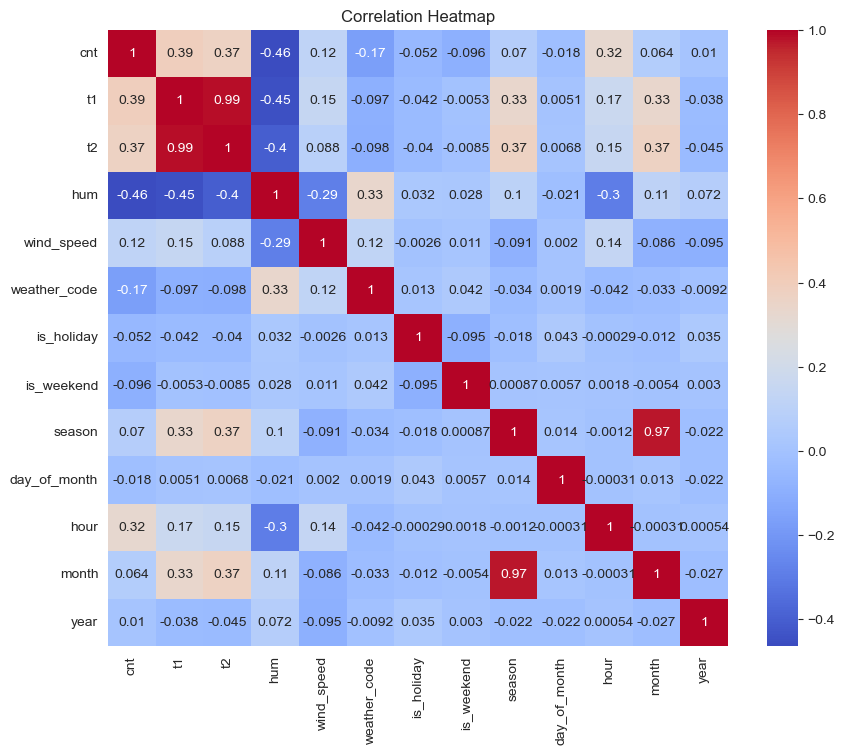

In [58]:
# for all variables 
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

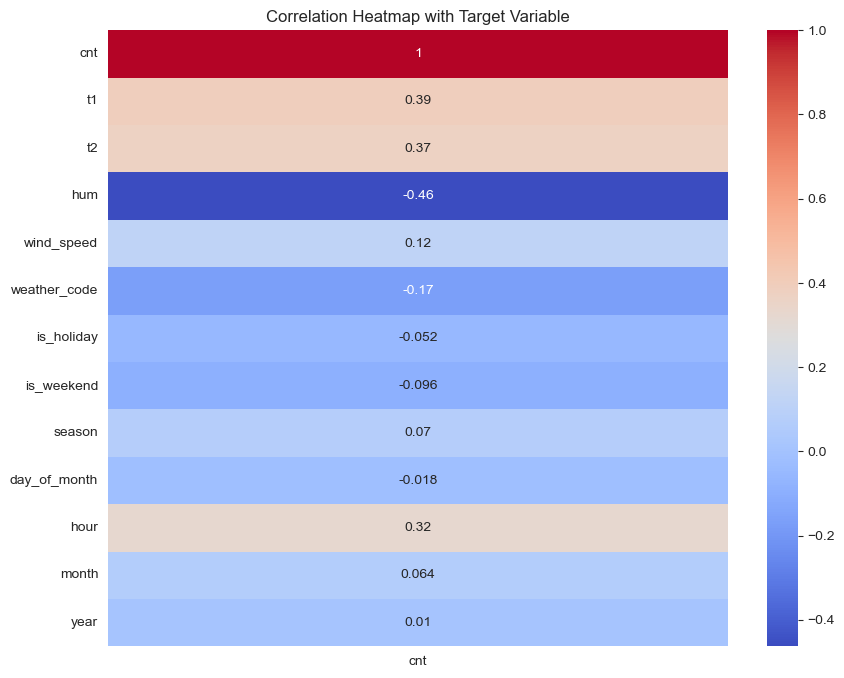

In [59]:
# for the target variable
target_corr = corr['cnt']

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(target_corr.to_frame(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap with Target Variable')
plt.show()

### Visualize the correlation of the target variable and the other features with barplot

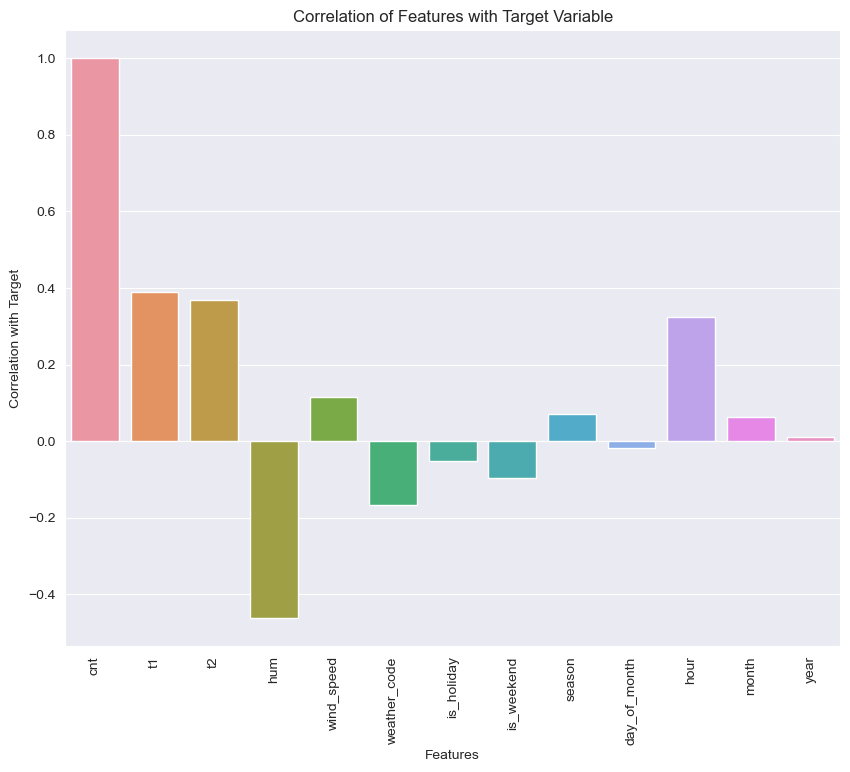

In [60]:
#with pandas
# corr_with_target = df.corr()['target_variable'].drop('target_variable')

# Create bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x=target_corr.index, y=target_corr.values)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Correlation with Target')
plt.title('Correlation of Features with Target Variable')
plt.show()

### Plot bike shares over time using lineplot

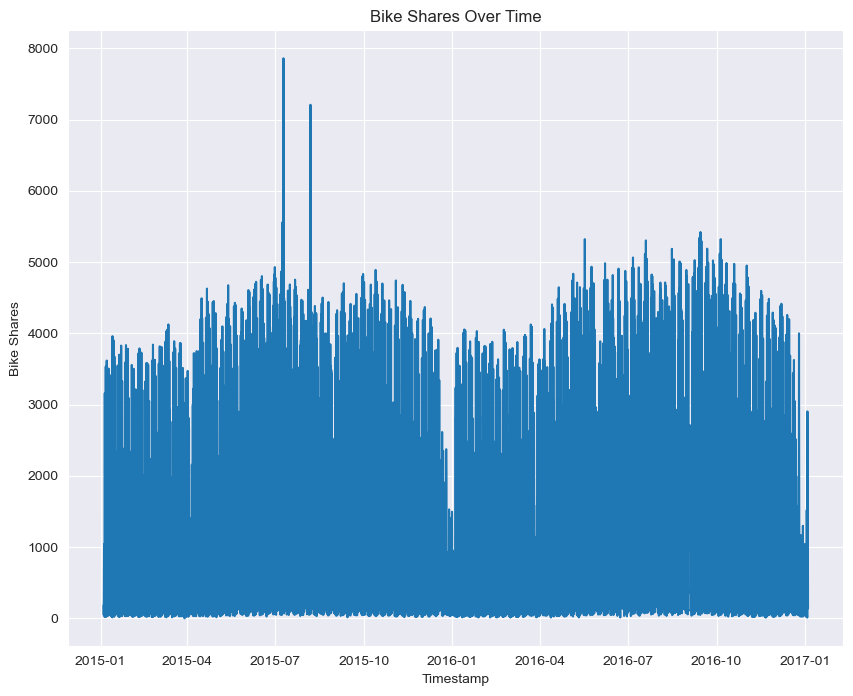

In [30]:
plt.figure(figsize=(10, 8))
sns.lineplot(x='timestamp', y='cnt', data=df)
plt.xlabel('Timestamp')
plt.ylabel('Bike Shares')
plt.title('Bike Shares Over Time')
plt.show()

### Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot)

In [61]:
monthly_data = df.groupby(['year_month', 'month'])['cnt'].mean().reset_index()

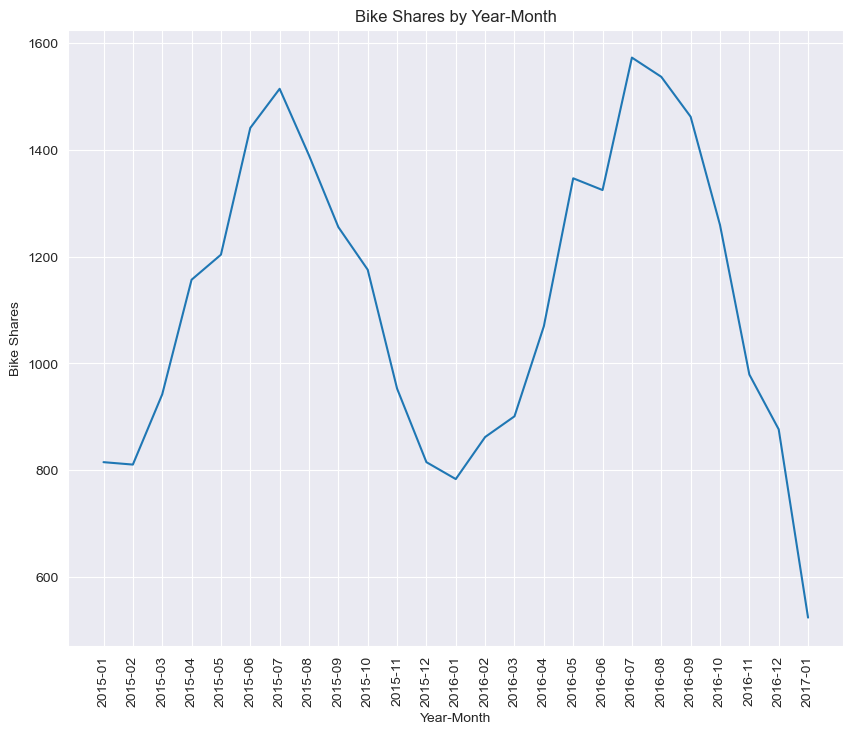

In [64]:
# with lineplot


plt.figure(figsize=(10, 8))
sns.lineplot(x='year_month', y='cnt', data=monthly_data)
plt.xlabel('Year-Month')
plt.ylabel('Bike Shares')
plt.title('Bike Shares by Year-Month')
plt.xticks(rotation=90)
plt.show()

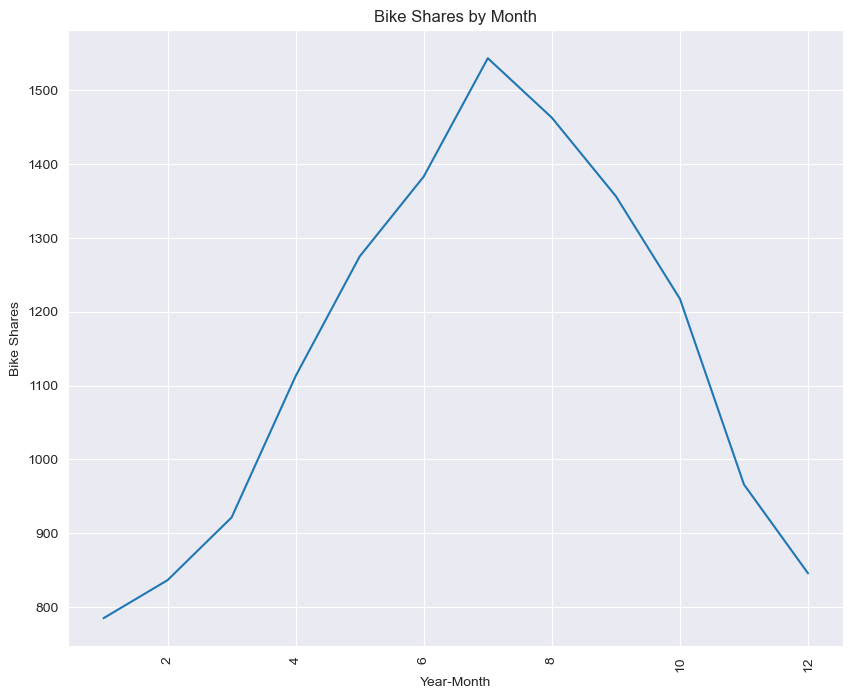

In [68]:
# with lineplot
plt.figure(figsize=(10, 8))
sns.lineplot(x='month', y='cnt', data=monthly_data2)
plt.xlabel('Year-Month')
plt.ylabel('Bike Shares')
plt.title('Bike Shares by Month')
plt.xticks(rotation=90)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


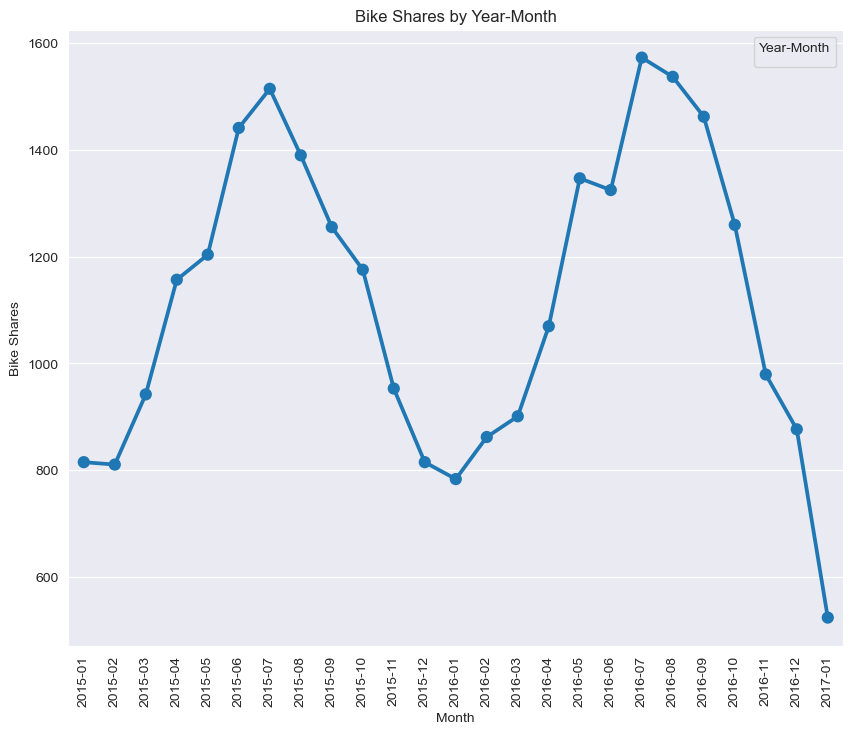

In [74]:
# with pointplot
plt.figure(figsize=(10, 8))
sns.pointplot(x='year_month', y='cnt', data=monthly_data)
plt.xlabel('Month')
plt.ylabel('Bike Shares')
plt.title('Bike Shares by Year-Month')
plt.xticks(rotation=90)
plt.legend(title='Year-Month')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


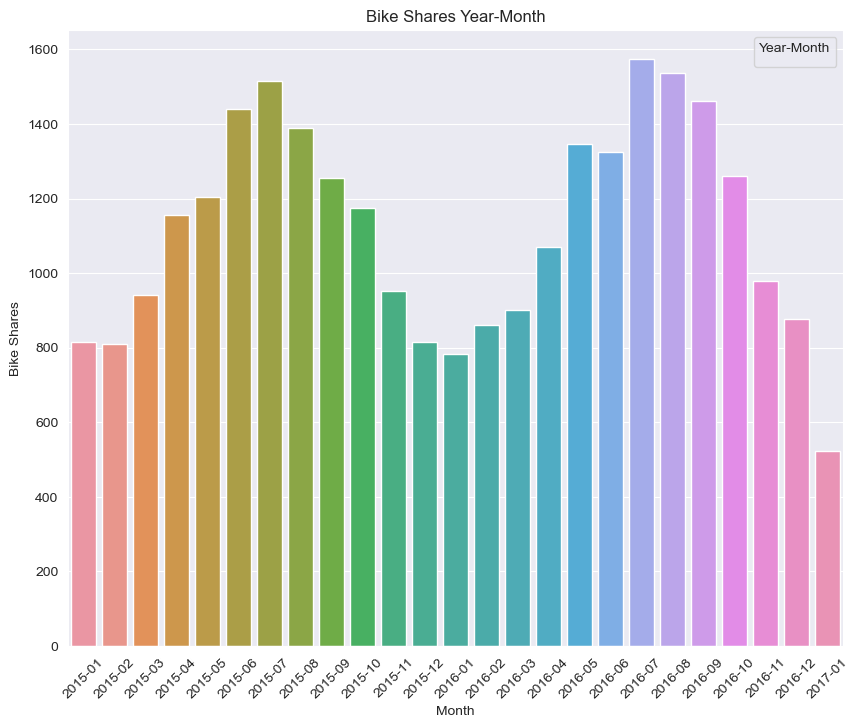

In [78]:
# with barplot
plt.figure(figsize=(10, 8))
sns.barplot(x='year_month', y='cnt', data=monthly_data)
plt.xlabel('Month')
plt.ylabel('Bike Shares')
plt.title('Bike Shares Year-Month')
plt.xticks(rotation=45)
plt.legend(title='Year-Month')
plt.show()

### Plot bike shares by hours on (holidays, weekend, season)

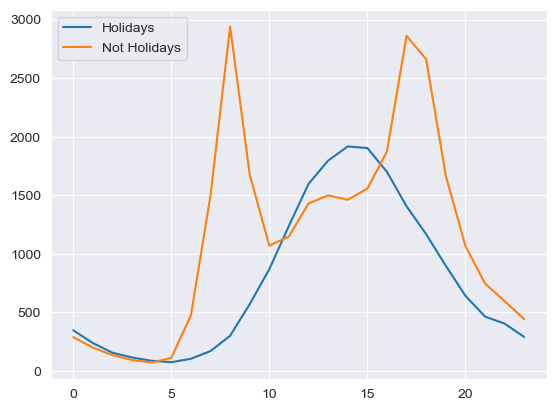

In [81]:
# with lineplot (*whether it is a holiday or not*)

holidays = df[df['is_holiday'] == 1]
holidays_hourly=holidays.groupby(['hour'])['cnt'].mean().reset_index()

not_holidays=df[df['is_holiday'] == 0]
not_holidays_hourly=not_holidays.groupby(['hour'])['cnt'].mean().reset_index()

plt.plot(holidays_hourly.hour, holidays_hourly.cnt, label='Holidays')
plt.plot(not_holidays_hourly.hour, not_holidays_hourly.cnt, label='Not Holidays')
plt.legend()




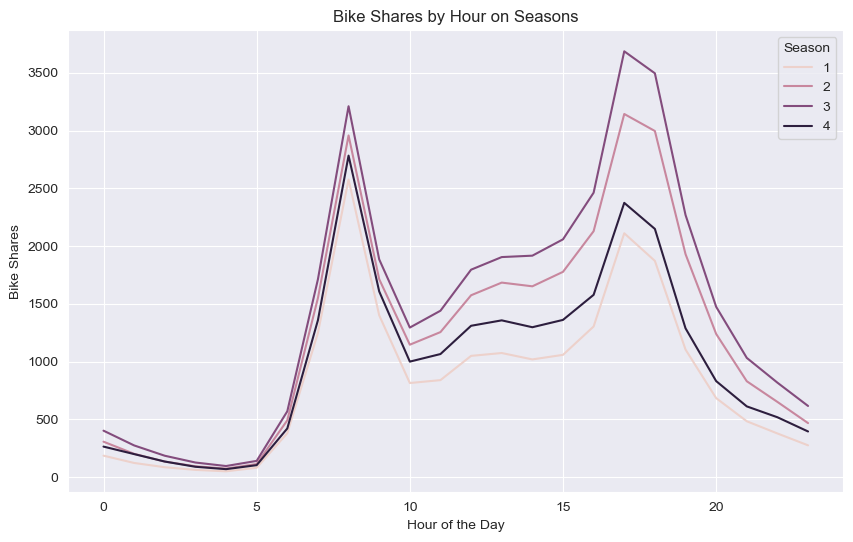

In [82]:
# with lineplot (*You may want to see seasonal breakdowns*)
season_hourly = df.groupby(['season', 'hour'])['cnt'].mean().reset_index()


plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='cnt', hue='season', data=season_hourly)


plt.title('Bike Shares by Hour on Seasons')
plt.xlabel('Hour of the Day')
plt.ylabel('Bike Shares')

# Show the legend
plt.legend(title='Season')


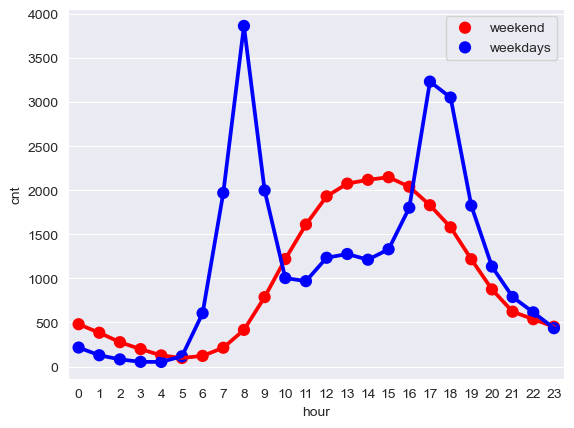

In [87]:
# with pointplot
weekend_hourly = df[df['is_weekend'] == 1].groupby(['hour'])['cnt'].mean().reset_index()
not_weekend_hourly = df[df['is_weekend'] == 0].groupby(['hour'])['cnt'].mean().reset_index()


sns.pointplot(x='hour', y='cnt', data=weekend_hourly, color='r',label='weekend')
sns.pointplot(x='hour', y='cnt', data=not_weekend_hourly, color='b', label='weekdays')
plt.legend()

### Plot bike shares based on whether it is a holiday or not
- You may want to see whether it is a holiday or not

Text(0, 0.5, 'Average Bike Shares')

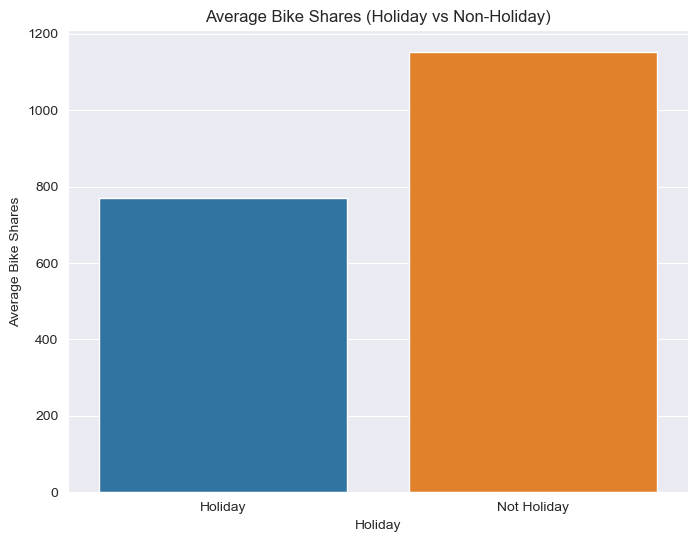

In [88]:
# with barplot
holiday_avg = df[df['is_holiday'] == 1]['cnt'].mean()
not_holiday_avg = df[df['is_holiday'] == 0]['cnt'].mean()

# Create a bar plot to visualize bike shares for holidays and non-holidays
plt.figure(figsize=(8, 6))
sns.barplot(x=['Holiday', 'Not Holiday'], y=[holiday_avg, not_holiday_avg])

plt.title('Average Bike Shares (Holiday vs Non-Holiday)')
plt.xlabel('Holiday')
plt.ylabel('Average Bike Shares')

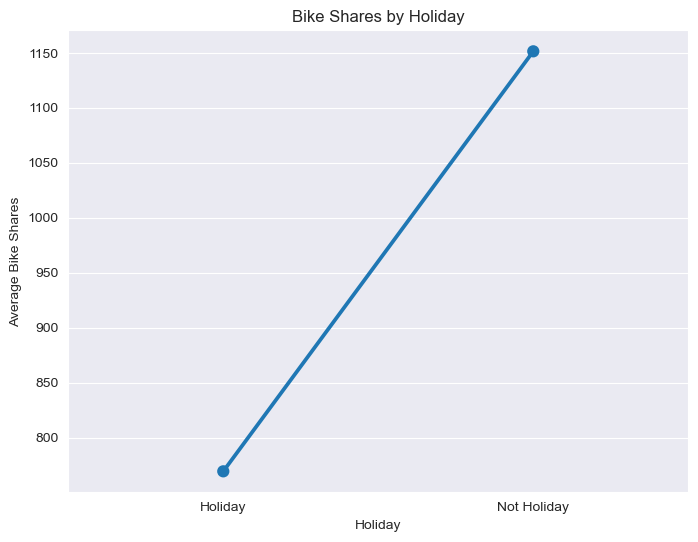

In [90]:
# with pointplot
plt.figure(figsize=(8, 6))
sns.pointplot(x=['Holiday', 'Not Holiday'], y=[holiday_avg, not_holiday_avg], markers='o')

plt.title('Bike Shares by Holiday')
plt.xlabel('Holiday')
plt.ylabel('Average Bike Shares')

plt.show()

### Plot bike shares by day of month

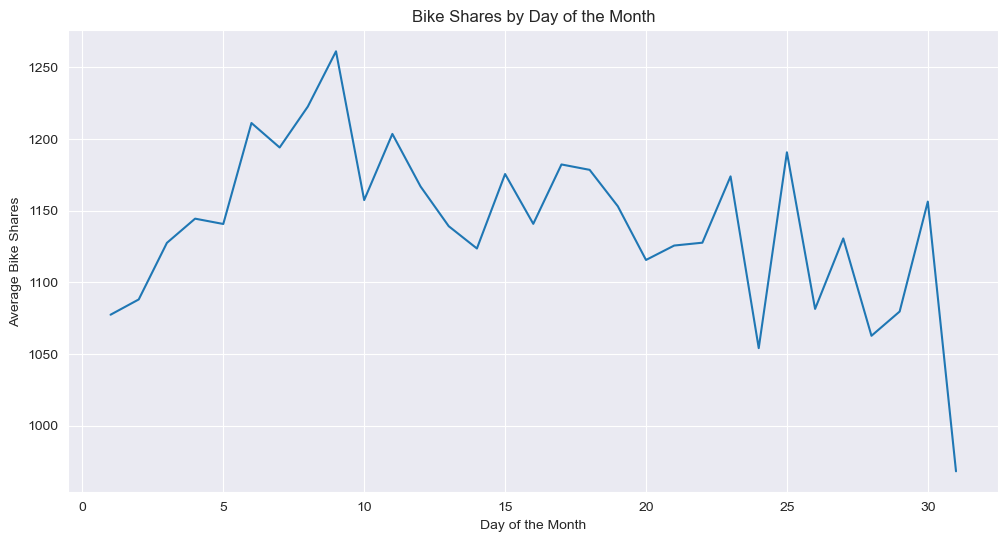

In [91]:
#with lineplot

daily_avg = df.groupby('day_of_month')['cnt'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=daily_avg.index, y=daily_avg.values)

plt.title('Bike Shares by Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Average Bike Shares')

plt.show()

### Plot bike shares by year
### Plot bike shares on holidays by seasons

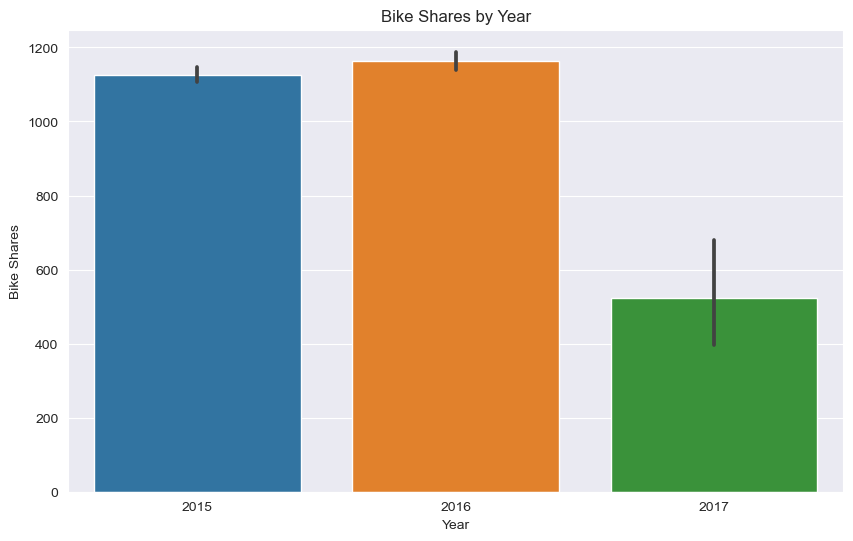

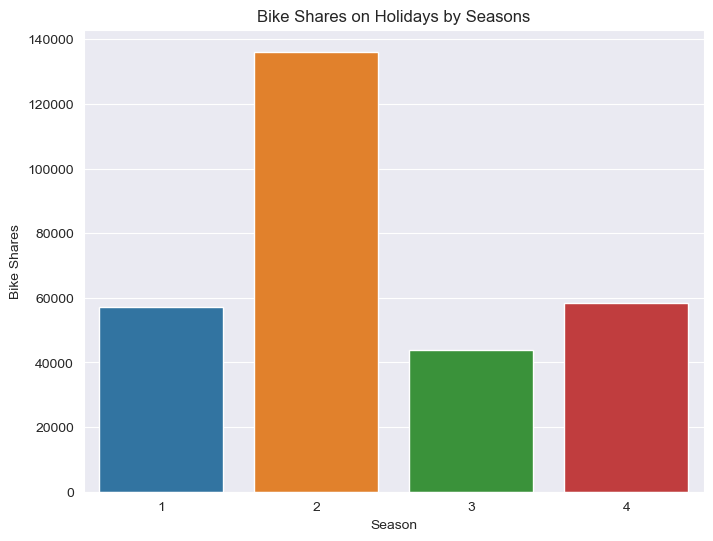

In [94]:
# with barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='cnt', data=df)
plt.title('Bike Shares by Year')
plt.xlabel('Year')
plt.ylabel('Bike Shares')
plt.show()

holiday_seasons = df[df['is_holiday'] == 1].groupby('season')['cnt'].sum().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='season', y='cnt', data=holiday_seasons)
plt.title('Bike Shares on Holidays by Seasons')
plt.xlabel('Season')
plt.ylabel('Bike Shares')
plt.show()

In [ ]:
# with barplot

### Visualize the distribution of bike shares by weekday/weekend with piechart and barplot

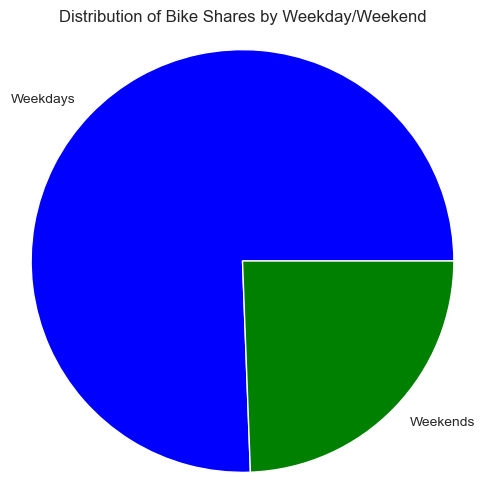

In [97]:
# pie charty
weekday_total = df[df['is_weekend'] == 0]['cnt'].sum()
weekend_total = df[df['is_weekend'] == 1]['cnt'].sum()
plt.figure(figsize=(6, 6))
labels = ['Weekdays', 'Weekends']
sizes = [weekday_total, weekend_total]
colors = ['blue', 'green']
explode = (0.1, 0)  # Explode the first slice

plt.pie(sizes, labels=labels, colors=colors)
plt.title('Distribution of Bike Shares by Weekday/Weekend')
plt.axis('equal')

plt.show()

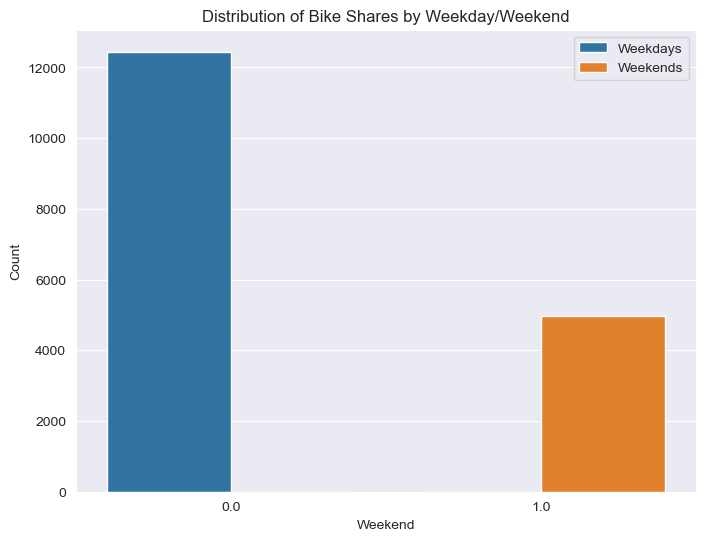

In [98]:
# with countplot
plt.figure(figsize=(8, 6))
sns.countplot(x='is_weekend', data=df, hue='is_weekend')


plt.title('Distribution of Bike Shares by Weekday/Weekend')
plt.xlabel('Weekend')
plt.ylabel('Count')


plt.legend(['Weekdays', 'Weekends'])

plt.show()

### Plot the distribution of weather code by seasons

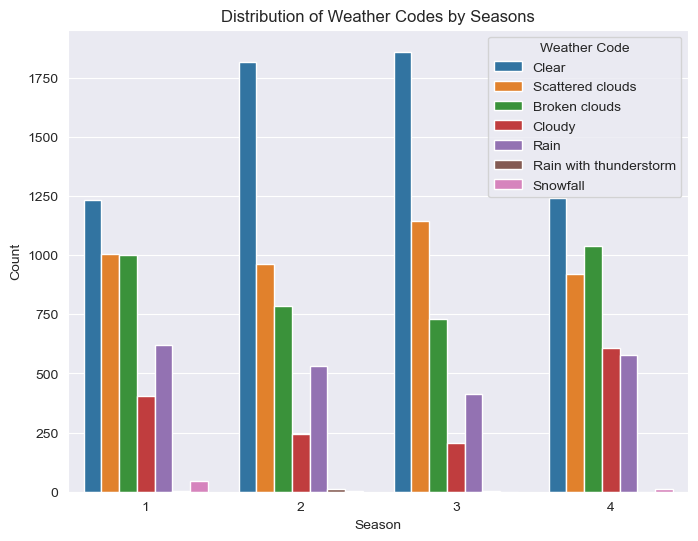

In [112]:
# with countplot
plt.figure(figsize=(8, 6))
sns.countplot(x='season', data=df, hue='weather_code')

plt.title('Distribution of Weather Codes by Seasons')
plt.xlabel('Season')
plt.ylabel('Count')

weather_code_meanings = {
    1: 'Clear',
    2: 'Scattered clouds',
    3: 'Broken clouds',
    4: 'Cloudy',
    7: 'Rain',
    10: 'Rain with thunderstorm',
    26: 'Snowfall',
    94: 'Freezing Fog'
}

handles, labels = plt.gca().get_legend_handles_labels()
labels = [weather_code_meanings[int(float(label))] for label in labels]

plt.legend(handles, labels, title='Weather Code')

plt.show()

<Figure size 800x600 with 0 Axes>

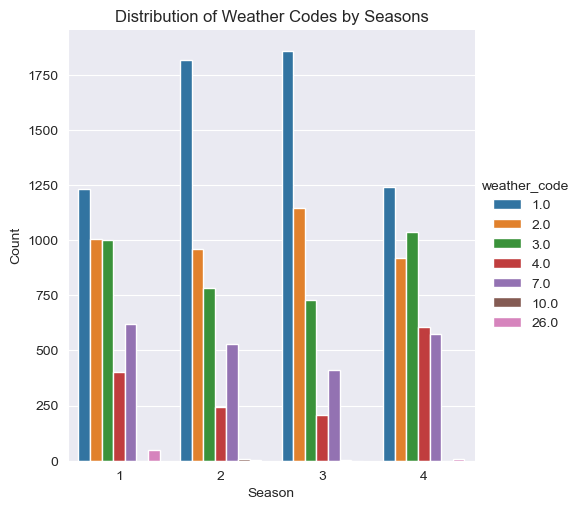

In [117]:
# with catplot
plt.figure(figsize=(8, 6))
sns.catplot(x='season', hue='weather_code', data=df, kind='count')

plt.title('Distribution of Weather Codes by Seasons')
plt.xlabel('Season')
plt.ylabel('Count')



plt.show()
